# Introduction 

This notebook analyzes the contributions made by people who volunteer vs those that don't.  It looks at overall totals and breaks down according to gender and the number of volunteer activity counts.  

The first part of the notebook is mainly exploratory, while the second half produces graphs to illustrate results.  

Some comments are given throughout the notebook.  

by Fred Etter - December, 2019

In [1]:
# Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import sklearn
from sklearn.feature_selection import SelectFromModel
from datetime import datetime
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

Here’s a brief explanation of the columns:
 
- ContactId – Is the individual’s GUID from our CRM system
- Year –   This is really the fiscal year starting July 1st – June 30th. Pledging and volunteerism are organized around this cycle.
- PledgeTotal – Total gift for the year
- VolType – This help to differentiate between standard volunteerism (harvest hope, etc.) to the United Way internal etc. 
- VolunteerActivityCnt – the number of instances of volunteerism per year & type

In [2]:
# Read in the data
df = pd.read_csv('file1_12_3.csv', low_memory=False)

In [3]:
df.head()

,ContactId,Year,PledgeTotal,VolType,VolunteerActivityCnt,BirthYear,Gender
0,874ddbce-11cd-e111-941f-00259073dc22,2007,52.00,NaN,NaN,1977.0,female
1,9a4ddbce-11cd-e111-941f-00259073dc22,2007,80.00,NaN,NaN,1968.0,female
2,5e4edbce-11cd-e111-941f-00259073dc22,2007,10000.00,NaN,NaN,1958.0,male
3,c150dbce-11cd-e111-941f-00259073dc22,2007,120.00,NaN,NaN,NaN,male
4,0b53dbce-11cd-e111-941f-00259073dc22,2007,500.16,NaN,NaN,1947.0,female


In [4]:
df.shape

(385722, 7)

The following shows the unique supporters with number of times they have donated.

In [5]:
df.ContactId.value_counts()

8d4eb7d0-11cd-e111-941f-00259073dc22    19
2b41e8cf-11cd-e111-941f-00259073dc22    18
47b735cf-11cd-e111-941f-00259073dc22    17
e342e8cf-11cd-e111-941f-00259073dc22    17
adb455d0-11cd-e111-941f-00259073dc22    17
                                        ..
9a3a15d2-11cd-e111-941f-00259073dc22     1
afaeb6b2-41bc-e411-a7a9-26d4160798d6     1
48f46151-95ba-e811-8100-0050569e2a4f     1
7a2d0cce-11cd-e111-941f-00259073dc22     1
a38f2922-23c7-e811-8106-0050569e2a4f     1
Name: ContactId, Length: 118799, dtype: int64

In [6]:
df.ContactId.unique().shape

(118799,)

The following shows just one very active supporter:

In [7]:
df[df.ContactId == '8d4eb7d0-11cd-e111-941f-00259073dc22']

,ContactId,Year,PledgeTotal,VolType,VolunteerActivityCnt,BirthYear,Gender
191339,8d4eb7d0-11cd-e111-941f-00259073dc22,2007,520.0,NaN,NaN,1953.0,female
197603,8d4eb7d0-11cd-e111-941f-00259073dc22,2008,545.0,NaN,NaN,1953.0,female
206100,8d4eb7d0-11cd-e111-941f-00259073dc22,2009,520.0,NaN,NaN,1953.0,female
218968,8d4eb7d0-11cd-e111-941f-00259073dc22,2011,650.0,NaN,NaN,1953.0,female
379122,8d4eb7d0-11cd-e111-941f-00259073dc22,2015,1092.0,"Council, Committe or Board",1.0,1953.0,female
379149,8d4eb7d0-11cd-e111-941f-00259073dc22,2014,1040.0,"Council, Committe or Board",1.0,1953.0,female
379393,8d4eb7d0-11cd-e111-941f-00259073dc22,2013,1040.0,"Council, Committe or Board",1.0,1953.0,female
379552,8d4eb7d0-11cd-e111-941f-00259073dc22,2012,1040.0,Standard,1.0,1953.0,female
379731,8d4eb7d0-11cd-e111-941f-00259073dc22,2010,520.0,Standard,1.0,1953.0,female
384627,8d4eb7d0-11cd-e111-941f-00259073dc22,2016,1170.0,"Council, Committe or Board",2.0,1953.0,female


The following groups by type of volunteer:

In [8]:
df.groupby('VolType').count()

,ContactId,Year,PledgeTotal,VolunteerActivityCnt,BirthYear,Gender
VolType,,,,,,
"Council, Committe or Board",1632,1632,1090,1632,1139,1594
Standard,8439,8439,3218,8439,2515,7890


The following groups by year and counts the total records by year and column:

In [9]:
df.groupby('Year').count()

,ContactId,PledgeTotal,VolType,VolunteerActivityCnt,BirthYear,Gender
Year,,,,,,
1900,7,0,7,7,5,7
2007,25567,25567,2,2,10289,25560
2008,30270,30270,2,2,12948,30268
2009,30900,30900,2,2,14352,30896
2010,28774,28599,324,324,13228,28769
2011,30222,29408,1274,1274,14276,30213
2012,30919,29471,2354,2354,13379,30893
2013,32096,31056,1734,1734,13035,32001
2014,33740,33464,657,657,13009,32437


In [10]:
df_standard = df.drop(df[df.VolType == 'Council, Committe or Board'].index).fillna(0)
df_council = df.drop(df[df.VolType == 'Standard'].index).fillna(0)

df_gender = df.copy()

In [11]:
# just standard and all other donators
df_standard.head()

,ContactId,Year,PledgeTotal,VolType,VolunteerActivityCnt,BirthYear,Gender
0,874ddbce-11cd-e111-941f-00259073dc22,2007,52.00,0,0.0,1977.0,female
1,9a4ddbce-11cd-e111-941f-00259073dc22,2007,80.00,0,0.0,1968.0,female
2,5e4edbce-11cd-e111-941f-00259073dc22,2007,10000.00,0,0.0,1958.0,male
3,c150dbce-11cd-e111-941f-00259073dc22,2007,120.00,0,0.0,0.0,male
4,0b53dbce-11cd-e111-941f-00259073dc22,2007,500.16,0,0.0,1947.0,female


In [12]:
df_standard.shape

(384090, 7)

In [13]:
# just council and other donators (excludes standard type)
df_council.shape

(377283, 7)

In [14]:
# groupby number of volunteer activities
df.groupby('VolunteerActivityCnt').count()

,ContactId,Year,PledgeTotal,VolType,BirthYear,Gender
VolunteerActivityCnt,,,,,,
1.0,8432,8432,3301,8432,2678,7908
2.0,886,886,482,886,477,855
3.0,232,232,150,232,136,219
4.0,128,128,78,128,84,123
5.0,80,80,51,80,47,74
6.0,78,78,50,78,53,72
7.0,38,38,34,38,30,38
8.0,20,20,12,20,12,19
9.0,31,31,26,31,23,31


In [15]:
df = df.fillna(0)

In [16]:
df.head()

,ContactId,Year,PledgeTotal,VolType,VolunteerActivityCnt,BirthYear,Gender
0,874ddbce-11cd-e111-941f-00259073dc22,2007,52.00,0,0.0,1977.0,female
1,9a4ddbce-11cd-e111-941f-00259073dc22,2007,80.00,0,0.0,1968.0,female
2,5e4edbce-11cd-e111-941f-00259073dc22,2007,10000.00,0,0.0,1958.0,male
3,c150dbce-11cd-e111-941f-00259073dc22,2007,120.00,0,0.0,0.0,male
4,0b53dbce-11cd-e111-941f-00259073dc22,2007,500.16,0,0.0,1947.0,female


In [17]:
# renaming some columns
df = df.rename(columns={'VolunteerActivityCnt': 'times'})
df_standard = df_standard.rename(columns={'VolunteerActivityCnt': 'times'})
df_council = df_council.rename(columns={'VolunteerActivityCnt': 'times'})

In [18]:
df.head()

,ContactId,Year,PledgeTotal,VolType,times,BirthYear,Gender
0,874ddbce-11cd-e111-941f-00259073dc22,2007,52.00,0,0.0,1977.0,female
1,9a4ddbce-11cd-e111-941f-00259073dc22,2007,80.00,0,0.0,1968.0,female
2,5e4edbce-11cd-e111-941f-00259073dc22,2007,10000.00,0,0.0,1958.0,male
3,c150dbce-11cd-e111-941f-00259073dc22,2007,120.00,0,0.0,0.0,male
4,0b53dbce-11cd-e111-941f-00259073dc22,2007,500.16,0,0.0,1947.0,female


In [19]:
df.loc[df['times'] != 0].mean()

Year           2013.786913
PledgeTotal     567.161677
times             1.479098
BirthYear       714.729520
dtype: float64

## Volunteers:

In [20]:
# Volunteers:

print(df.PledgeTotal.loc[df.times != 0].count())
print(df.PledgeTotal.loc[df.times != 0].mean())
print(df.PledgeTotal.loc[df.times != 0].median())
print('{:,}'.format(df.PledgeTotal.loc[df.times != 0].max()))
print('{:,}'.format(df.PledgeTotal.loc[df.times != 0].sum()))

10071
567.1616770926436
0.0
100,000.0
5,711,885.25


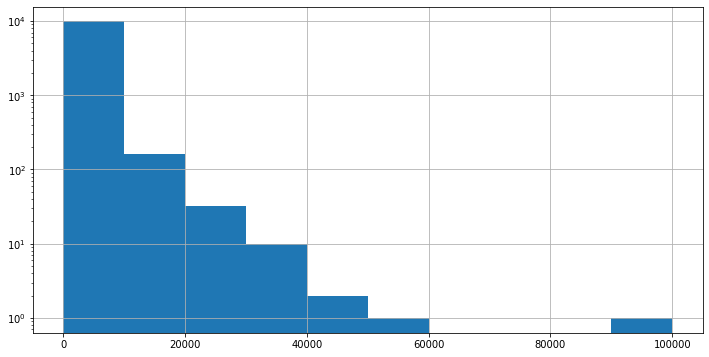

In [21]:
# Volunteers

df.PledgeTotal.loc[df.times != 0].hist(figsize=(12, 6), log=True)

In [22]:
# remove outlier

df1 = df.drop(df.query('PledgeTotal == 100000').index)

In [23]:
print(df1.PledgeTotal.loc[df1.times != 0].mean())
print(df1.PledgeTotal.loc[df1.times != 0].median())
print('{:,}'.format(df1.PledgeTotal.loc[df1.times != 0].max()))
print('{:,}'.format(df1.PledgeTotal.loc[df1.times != 0].sum()))

557.2875124131094
0.0
55,000.0
5,611,885.25


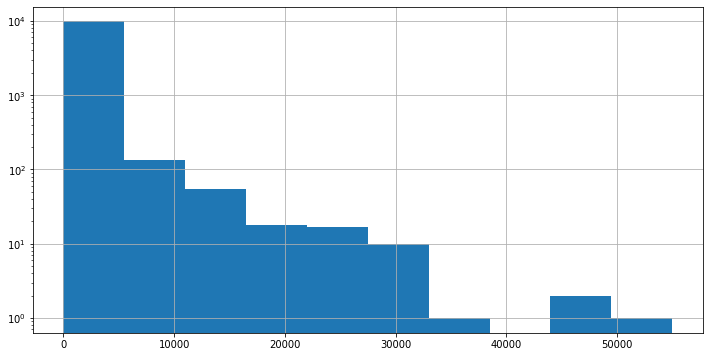

In [24]:
# without outlier

df1.PledgeTotal.loc[df1.times != 0].hist(figsize=(12, 6), log=True)

In [25]:
df_plot = df.copy()
df_plot['v'] = pd.Series(np.where(df.times.values > 0, 0, 1),
          df.index)

df_standard['v'] = pd.Series(np.where(df.times.values > 0, 0, 1),
          df.index)

df_council['v'] = pd.Series(np.where(df.times.values > 0, 0, 1),
          df.index)

In [26]:
df_standard.head()

,ContactId,Year,PledgeTotal,VolType,times,BirthYear,Gender,v
0,874ddbce-11cd-e111-941f-00259073dc22,2007,52.00,0,0.0,1977.0,female,1
1,9a4ddbce-11cd-e111-941f-00259073dc22,2007,80.00,0,0.0,1968.0,female,1
2,5e4edbce-11cd-e111-941f-00259073dc22,2007,10000.00,0,0.0,1958.0,male,1
3,c150dbce-11cd-e111-941f-00259073dc22,2007,120.00,0,0.0,0.0,male,1
4,0b53dbce-11cd-e111-941f-00259073dc22,2007,500.16,0,0.0,1947.0,female,1


## Non Volunteers:

In [27]:
# Non Volunteers:

print(df.PledgeTotal.loc[df.times == 0].count())
print(df.PledgeTotal.loc[df.times == 0].mean())
print(df.PledgeTotal.loc[df.times == 0].median())
print('{:,}'.format(df.PledgeTotal.loc[df.times == 0].max()))
print('{:,}'.format(df.PledgeTotal.loc[df.times == 0].sum()))

375651
264.8322319386922
104.0
304,142.82
99,484,492.76


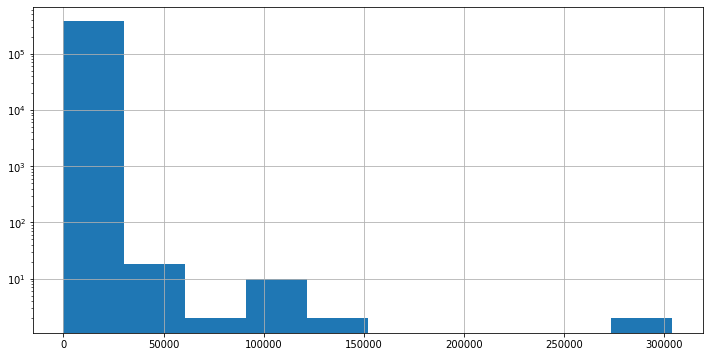

In [28]:
# Non Volunteers

df.PledgeTotal.loc[df.times == 0].hist(figsize=(12, 6), log=True)

In [29]:
# remove outliers

df2 = df.drop(df.query('PledgeTotal == 304142.82').index)
df2 = df2.drop(df2.query('PledgeTotal == 303500').index)

In [30]:
print(df2.PledgeTotal.loc[df2.times == 0].mean())
print(df2.PledgeTotal.loc[df2.times == 0].median())
print('{:,}'.format(df2.PledgeTotal.loc[df2.times == 0].max()))
print('{:,}'.format(df2.PledgeTotal.loc[df2.times == 0].sum()))

263.21606057783106
104.0
151,000.0
98,876,849.94


Removing the outlier contributions don't seem to make much of a difference for any meaningful calculation with this data.

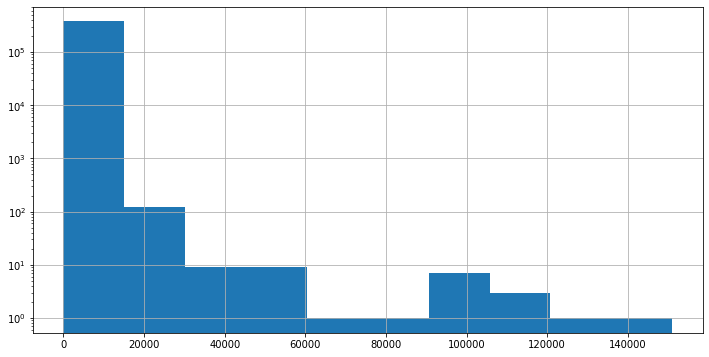

In [31]:
# without outlier

df2.PledgeTotal.loc[df2.times == 0].hist(figsize=(12, 6), log=True)

The following graph shows the number of volunteers who donate vs all other people who donate:

Text(0.5, 1.0, 'Number of volunteers vs. number of non volunteers who donated')

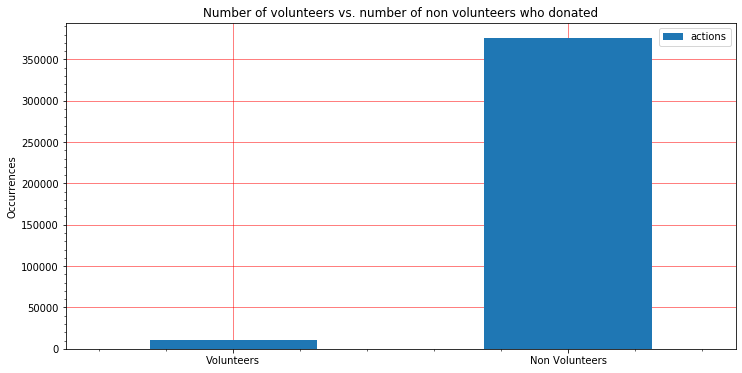

In [32]:
v = df.PledgeTotal.loc[df.times != 0].count()
nv = df.PledgeTotal.loc[df.times == 0].count()

actions = [v, nv]
index = ['Volunteers', 'Non Volunteers']
df = pd.DataFrame({'actions': actions}, index=index)
ax = df.plot.bar(rot=0, figsize=(12, 6))
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.ylabel('Occurrences')
plt.title("Number of volunteers vs. number of non volunteers who donated")

In [33]:
df_plot.head()

,ContactId,Year,PledgeTotal,VolType,times,BirthYear,Gender,v
0,874ddbce-11cd-e111-941f-00259073dc22,2007,52.00,0,0.0,1977.0,female,1
1,9a4ddbce-11cd-e111-941f-00259073dc22,2007,80.00,0,0.0,1968.0,female,1
2,5e4edbce-11cd-e111-941f-00259073dc22,2007,10000.00,0,0.0,1958.0,male,1
3,c150dbce-11cd-e111-941f-00259073dc22,2007,120.00,0,0.0,0.0,male,1
4,0b53dbce-11cd-e111-941f-00259073dc22,2007,500.16,0,0.0,1947.0,female,1


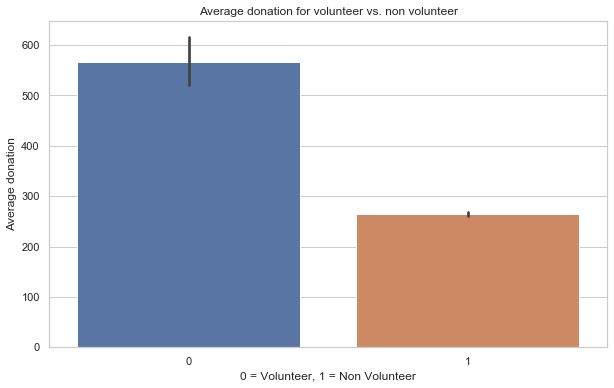

In [34]:
sns.set(style="whitegrid", rc={'figure.figsize':(10, 6)})
sns.barplot(x='v', y='PledgeTotal', ci=95, data=df_plot)
plt.xlabel('0 = Volunteer, 1 = Non Volunteer')
plt.ylabel('Average donation')
plt.title('Average donation for volunteer vs. non volunteer')
plt.show()

The above graph clearly shows that the people who volunteer and make a donation, donate a significantly higher average amount.  However....  see below...

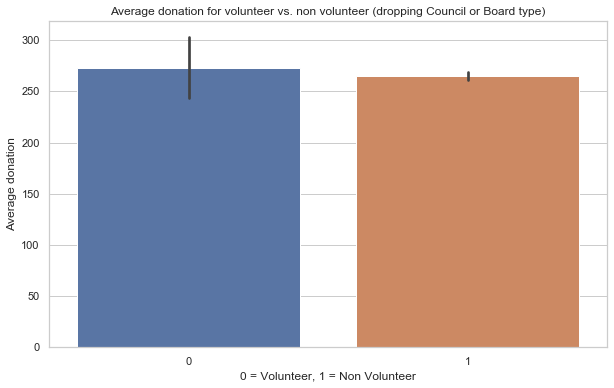

In [35]:
sns.set(style="whitegrid", rc={'figure.figsize':(10, 6)})
sns.barplot(x='v', y='PledgeTotal', ci=95, data=df_standard)
plt.xlabel('0 = Volunteer, 1 = Non Volunteer')
plt.ylabel('Average donation')
plt.title('Average donation for volunteer vs. non volunteer (dropping Council or Board type)')
plt.show()

The above graph shows that there is no difference in the volunteer mean donation amount (within 95% confidence) between 'Standard' type volunteers and non volunteers.

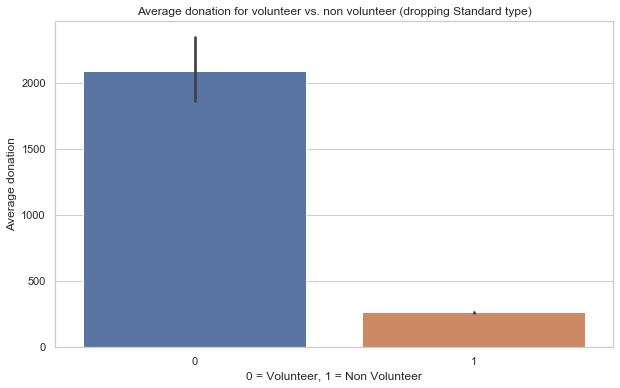

In [36]:
sns.set(style="whitegrid", rc={'figure.figsize':(10, 6)})
sns.barplot(x='v', y='PledgeTotal', ci=95, data=df_council)
plt.xlabel('0 = Volunteer, 1 = Non Volunteer')
plt.ylabel('Average donation')
plt.title('Average donation for volunteer vs. non volunteer (dropping Standard type)')
plt.show()

The above graph shows the significantly greater mean donation amount between 'Council, committe, board' volunteers vs non volunteers.

In [37]:
df_gender.head()

,ContactId,Year,PledgeTotal,VolType,VolunteerActivityCnt,BirthYear,Gender
0,874ddbce-11cd-e111-941f-00259073dc22,2007,52.00,NaN,NaN,1977.0,female
1,9a4ddbce-11cd-e111-941f-00259073dc22,2007,80.00,NaN,NaN,1968.0,female
2,5e4edbce-11cd-e111-941f-00259073dc22,2007,10000.00,NaN,NaN,1958.0,male
3,c150dbce-11cd-e111-941f-00259073dc22,2007,120.00,NaN,NaN,NaN,male
4,0b53dbce-11cd-e111-941f-00259073dc22,2007,500.16,NaN,NaN,1947.0,female


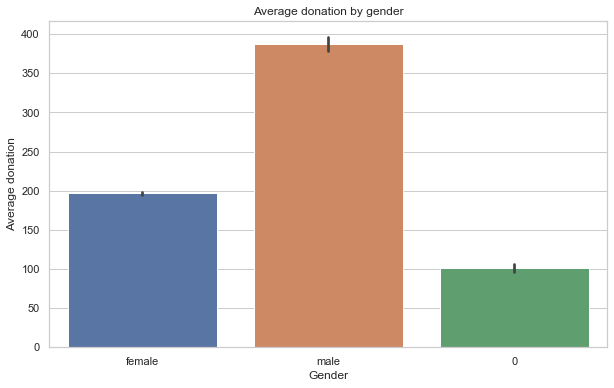

In [38]:
df_gender = df_gender.fillna(0)

sns.set(style="whitegrid", rc={'figure.figsize':(10, 6)})
sns.barplot(x='Gender', y='PledgeTotal', ci=95, data=df_gender)
plt.ylabel('Average donation')
plt.title('Average donation by gender')
plt.show()

The above graph shows the mean of all donations separated by gender.

In [39]:
df_gender.head()

,ContactId,Year,PledgeTotal,VolType,VolunteerActivityCnt,BirthYear,Gender
0,874ddbce-11cd-e111-941f-00259073dc22,2007,52.00,0,0.0,1977.0,female
1,9a4ddbce-11cd-e111-941f-00259073dc22,2007,80.00,0,0.0,1968.0,female
2,5e4edbce-11cd-e111-941f-00259073dc22,2007,10000.00,0,0.0,1958.0,male
3,c150dbce-11cd-e111-941f-00259073dc22,2007,120.00,0,0.0,0.0,male
4,0b53dbce-11cd-e111-941f-00259073dc22,2007,500.16,0,0.0,1947.0,female


In [40]:
df_gender = df_gender.drop(df_gender[df_gender.VolType == 0].index).fillna(0)

In [41]:
df_gender.shape

(10071, 7)

In [42]:
df_gender.head()

,ContactId,Year,PledgeTotal,VolType,VolunteerActivityCnt,BirthYear,Gender
375651,4c58f4ca-3545-e511-92f8-26d4160798d6,2015,0.0,Standard,1.0,0.0,0
375652,e34cb1d1-11cd-e111-941f-00259073dc22,2011,0.0,Standard,1.0,0.0,female
375653,29f9f78a-6681-e411-9b7f-26d4160798d6,2018,0.0,Standard,1.0,1955.0,female
375654,243015d2-11cd-e111-941f-00259073dc22,2015,0.0,Standard,1.0,0.0,female
375655,34aaf5d1-d3d1-e211-a0e0-4040184c1c1a,2012,0.0,Standard,1.0,0.0,female


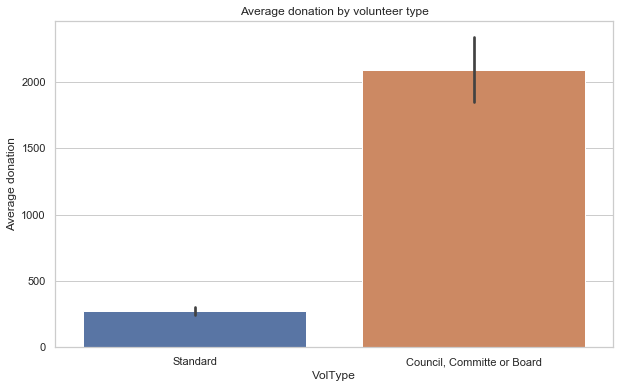

In [43]:
sns.set(style="whitegrid", rc={'figure.figsize':(10, 6)})
sns.barplot(x='VolType', y='PledgeTotal', ci=95, data=df_gender)
plt.ylabel('Average donation')
plt.title('Average donation by volunteer type')
plt.show()

As shown previously, the barplot above shows the difference in mean donation per volunteer type.

In [44]:
df_std_only = df_gender.drop(df_gender[df_gender.VolType == 'Council, Committe or Board'].index).fillna(0)

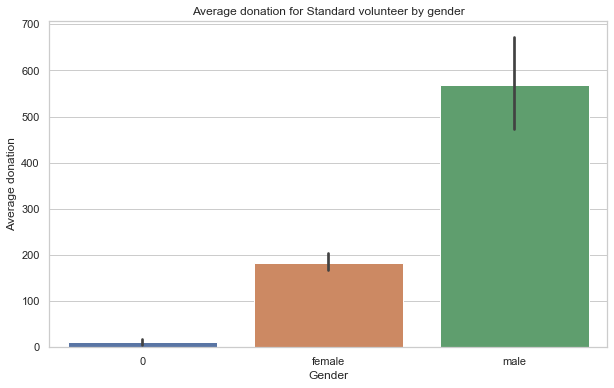

In [45]:
sns.set(style="whitegrid", rc={'figure.figsize':(10, 6)})
sns.barplot(x='Gender', y='PledgeTotal', ci=95, data=df_std_only)
plt.ylabel('Average donation')
plt.title('Average donation for Standard volunteer by gender')
plt.show()

The above graph shows that the male volunteers who donate, donate much more than the female volunteers who donate.  In other words, it might be wise to try to recruit male volunteers.

In [46]:
df_gender.nunique()

ContactId               6532
Year                      15
PledgeTotal              892
VolType                    2
VolunteerActivityCnt      26
BirthYear                 68
Gender                     3
dtype: int64

In [47]:
df_gender.ContactId.value_counts()

8d4eb7d0-11cd-e111-941f-00259073dc22    15
2b41e8cf-11cd-e111-941f-00259073dc22    14
483ae8cf-11cd-e111-941f-00259073dc22    14
537f03d1-11cd-e111-941f-00259073dc22    13
e342e8cf-11cd-e111-941f-00259073dc22    13
                                        ..
2df891a5-bcef-e211-a0e0-4040184c1c1a     1
d05b5185-9982-e211-a0e0-4040184c1c1a     1
3dc435cf-11cd-e111-941f-00259073dc22     1
73522be1-4175-e211-a0e0-4040184c1c1a     1
8027925b-f6c9-e211-a0e0-4040184c1c1a     1
Name: ContactId, Length: 6532, dtype: int64

In [48]:
df_gender.sample(10)

,ContactId,Year,PledgeTotal,VolType,VolunteerActivityCnt,BirthYear,Gender
385721,483815d2-11cd-e111-941f-00259073dc22,2014,500.4,Standard,28.0,1988.0,female
380144,dd0775ce-11cd-e111-941f-00259073dc22,2016,0.0,Standard,1.0,0.0,female
378723,94d5ae36-a0a7-e711-84bd-005056975e92,2017,0.0,Standard,1.0,0.0,0
382949,964935aa-e7f9-e211-a6e8-4040184c1c1a,2013,0.0,Standard,1.0,0.0,female
380390,7c3f15d2-11cd-e111-941f-00259073dc22,2011,0.0,Standard,1.0,0.0,male
378475,7245e8cf-11cd-e111-941f-00259073dc22,2013,0.0,"Council, Committe or Board",1.0,0.0,male
377081,334615d2-11cd-e111-941f-00259073dc22,2014,52.0,Standard,1.0,1949.0,male
380192,6d56b1d1-11cd-e111-941f-00259073dc22,2010,0.0,Standard,1.0,0.0,female
384916,95b05282-a231-e711-b10c-005056975e92,2017,0.0,Standard,2.0,0.0,0
381451,9e4915d2-11cd-e111-941f-00259073dc22,2014,210.6,Standard,1.0,1954.0,female


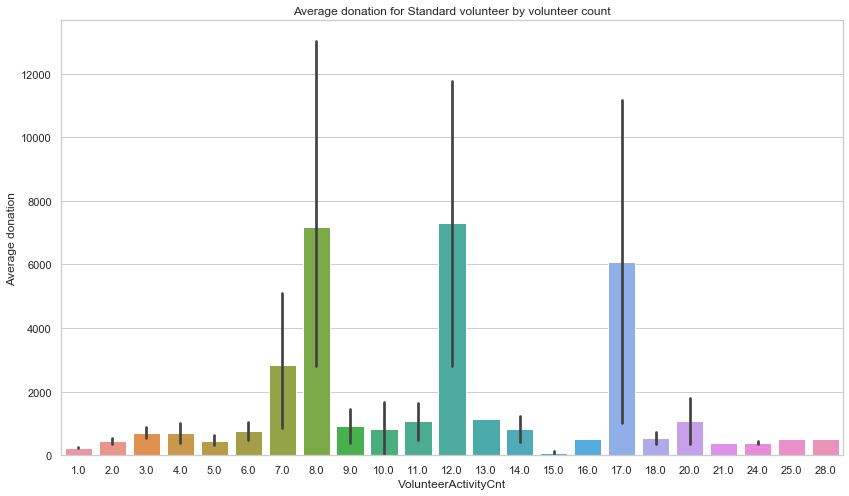

In [49]:
sns.set(style="whitegrid", rc={'figure.figsize':(14, 8)})
sns.barplot(x='VolunteerActivityCnt', y='PledgeTotal', ci=80, data=df_std_only)
plt.ylabel('Average donation')
plt.title('Average donation for Standard volunteer by volunteer count')
plt.show()

The above barplot shows the average donation for Standard type volunteers by the number of volunteer activities they participated in.  (with 80% confidence - vertical black line)

There does not seem to be a general trend (increasing or decreasing) based on the number of times someone volunteered.  However...  see below....

#### Next, look at donations for Standard type volunteers for 1 time voluneers vs. more than 1:

Text(0.5, 1.0, 'Average donation based on number of Standard volunteer activites')

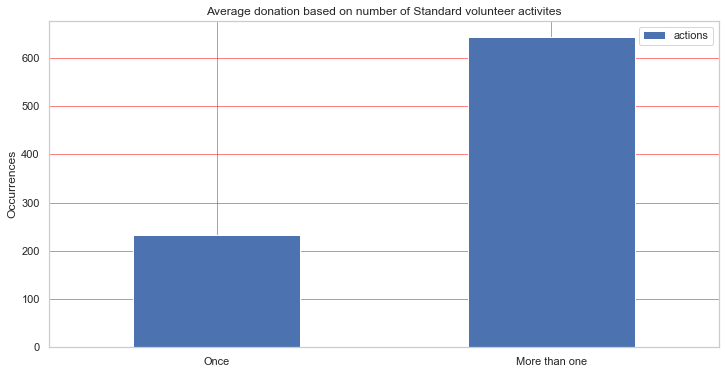

In [50]:
once = df_std_only.PledgeTotal.loc[df_std_only.VolunteerActivityCnt == 1].mean()
more_than_one = df_std_only.PledgeTotal.loc[df_std_only.VolunteerActivityCnt > 1].mean()

actions = [once, more_than_one]
index = ['Once', 'More than one']
df = pd.DataFrame({'actions': actions}, index=index)
ax = df.plot.bar(rot=0, figsize=(12, 6))
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.ylabel('Occurrences')
plt.title("Average donation based on number of Standard volunteer activites")

In [51]:
print(df_std_only.PledgeTotal.loc[df_std_only.VolunteerActivityCnt == 1].count())

7613


In [52]:
print(df_std_only.PledgeTotal.loc[df_std_only.VolunteerActivityCnt > 1].count())

826


From the 2 cells above, notice that most of the volunteers volunteer only 1 time.  Therefore, it might be wise to encourage people to volunteer more than once - because those that do donate more.

In [53]:
df_std_only['number'] = pd.Series(np.where(df_std_only.VolunteerActivityCnt.values == 1, 'once', 'more'),
          df_std_only.index)

In [54]:
df_std_only.head()

,ContactId,Year,PledgeTotal,VolType,VolunteerActivityCnt,BirthYear,Gender,number
375651,4c58f4ca-3545-e511-92f8-26d4160798d6,2015,0.0,Standard,1.0,0.0,0,once
375652,e34cb1d1-11cd-e111-941f-00259073dc22,2011,0.0,Standard,1.0,0.0,female,once
375653,29f9f78a-6681-e411-9b7f-26d4160798d6,2018,0.0,Standard,1.0,1955.0,female,once
375654,243015d2-11cd-e111-941f-00259073dc22,2015,0.0,Standard,1.0,0.0,female,once
375655,34aaf5d1-d3d1-e211-a0e0-4040184c1c1a,2012,0.0,Standard,1.0,0.0,female,once


Using barplot with 95% confidence interval (below) :

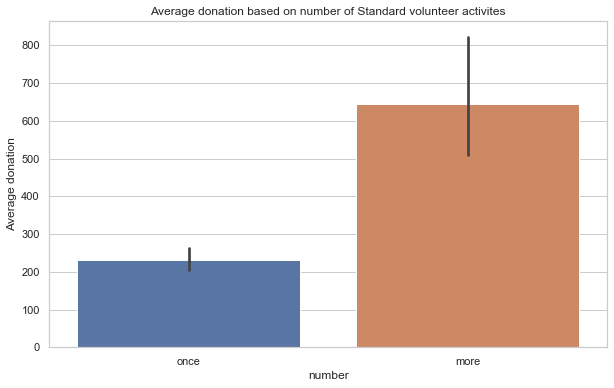

In [55]:
sns.set(style="whitegrid", rc={'figure.figsize':(10, 6)})
sns.barplot(x='number', y='PledgeTotal', ci=95, data=df_std_only)
plt.ylabel('Average donation')
plt.title('Average donation based on number of Standard volunteer activites')
plt.show()

Once again, the number of Standard volunteer who volunteered only 1 time = **7613**; compared to only **826** volunteers who volunteered more than 1 time.  

Those who volunteered more than once, donate much more on average.

# Conclusion  

1.  Standard type volunteers donate about the same amount, on average, as non volunteers.  
&nbsp;

2.  Council, Committee, Board type volunteers donate much more, on average, than do Standard type.  
&nbsp;

3.  Male and Standard type volunteers donate a lot more than Female and Standard type volunteers.  
&nbsp;

4.  Standard volunteers who volunteer more than one time donate significantly more than Standard volunteers who volunteer only 1 time.